In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,venue_name,venue_type,doi,keyword,volume,issue,publisher,weight,indexed_keyword,inverted_index
0,2022325078,toward zero-emission data centers through dire...,2009.0,t. brunschwiler;b. smith;e. ruetsche;b. michel,ibm research division zurich research laborato...,2047618117;2115522411;2504020083;2580273071,60.0,journal,5.0,1523610918;1970951564;2000917443;2051131492;21...,...,ibm journal of research and development,j,https://doi.org/10.1147/jrd.2009.5429024,process engineering;electric power;thermal ene...,53.0,3.0,ibm,0.43566;0.51234;0.57808;0.49015;0.36646;0.5679...,reuse;year;tested;supply;without;years;carbon;...,"[63];[103];[2];[114];[104];[169];[155, 206];[1..."
1,2285721383,unsupervised profiling of microglial arbor mor...,2016.0,yan xu;murad megjhani;kristen trett;william sh...,department of electrical and computer engineer...,2305386716;1978903048;54022465;2747184123;2810...,2.0,journal,19.0,173577600;1986141983;1987632951;2027805700;202...,...,ieee journal of selected topics in signal proc...,j,https://doi.org/10.1109/jstsp.2015.2505660,computer science;artificial intelligence;gibbs...,10.0,1.0,ieee,0.36504;0.0;0.48555;0.44544;0.41705;0.39988;0....,"extent;modeling,;arbors;tissue;approach;withou...","[177];[160];[4];[7, 23, 49, 191];[31, 57, 120]..."
2,2005800036,a posteriori error control for dpg methods,2014.0,carsten carstensen;leszek f. demkowicz;jayadee...,humboldt-universität zu berlin;aerospace engin...,2074401832;2001842475;2951177652,35.0,journal,18.0,1555557982;1963659668;1969838226;1980152816;19...,...,siam journal on numerical analysis,j,https://doi.org/10.1137/130924913,lamé function;residual;mathematical optimizati...,52.0,3.0,society for industrial and applied mathematics,0.47205;0.5181;0.44016;0.4856;0.45408;0.49123;...,equivalent;upper;led;petrov--galerkin;equation...,"[59];[83];[15];[18];[110];[36, 70];[32, 120];[..."
3,1977127553,identification of viscous friction coefficient...,2006.0,g. carducci;n. i. giannoccaro;a. messina;g. rollo,"dipartimento di ingegneria dell'innovazione, u...",2639625237;1967725667;2141415712;2209847199,19.0,journal,1.0,2142205786,...,mathematics and computers in simulation,j,https://doi.org/10.1016/j.matcom.2006.02.005,compressibility;differential equation;pneumati...,71.0,4.0,elsevier,0.44661;0.44759;0.68786;0.44461;0.44752;0.5158...,equivalent;introduces;[d.;apparatus;valves;pra...,"[111];[54];[178, 289];[438];[377, 410];[138, 1..."
4,2113963729,lightpath re-optimization in mesh optical netw...,2005.0,eric bouillet;jean-françois labourdette;ramu r...,"ibm t. j. watson research center, hawthorne, n...",2038428474;1975666549;2091275929;2137187722,67.0,journal,16.0,170313615;1577694414;1795183293;1867727907;200...,...,ieee acm transactions on networking,j,https://doi.org/10.1109/tnet.2005.845540,online algorithm;switched mesh;optical mesh ne...,13.0,2.0,ieee press,0.5471;0.67499;0.65769;0.45499;0.44852;0.47994...,backup;been;scenarios;when;approach;offer;thes...,"[84, 97, 122, 137];[206];[119];[132];[184];[6]..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56830,2169304700,molecular imaging of small animals with a trip...,2005.0,s.d. metzler;nan;nan;nan;nan;nan,"dept. of radiol., univ. of pennsylvania, phila...",2617505992;nan;nan;nan;nan;nan,59.0,journal,7.0,2080411675;2095851204;2111445764;2128456478;21...,...,ieee transactions on medical imaging,j,https://doi.org/10.1109/tmi.2005.848357,nuclear medicine;gamma camera;linear stage;art...,24.0,7.0,ieee,0.36482;0.52335;0.47139;0.0;0.49607;0.49521;0....,small;large.;available;used;when;animals.;with...,"[22, 122];[79];[84];[112];[5, 29];[23, 123];[7..."
56831,2079173502,evolution of industrial automation,2006.0,r. murugesan,"crescendo consultants, chennai 600 020, india#...",2574525139,10.0,journal,1.0,1639032689,...,journal of computer applications in technology,j,https://doi.org/10.15

In [3]:
df.iloc[2]

id                                                        2005800036
title                     a posteriori error control for dpg methods
year                                                          2014.0
author_name        carsten carstensen;leszek f. demkowicz;jayadee...
author_org         humboldt-universität zu berlin;aerospace engin...
author_id                           2074401832;2001842475;2951177652
n_citation                                                      35.0
doc_type                                                     journal
reference_count                                                 18.0
references         1555557982;1963659668;1969838226;1980152816;19...
venue_id                                                 203348814.0
venue_name                        siam journal on numerical analysis
venue_type                                                         j
doi                                https://doi.org/10.1137/130924913
keyword            lamé function;r

# Data preprocessing and type conversion

In [4]:
# Convert columns that should be numeric to numeric

numeric_columns = ['year', 'n_citation', 'reference_count', 'volume', 'issue'] # didnt convert venue_id etc
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# df.dtypes

In [5]:
# Check for missing values
print(df.isnull().sum())

# drop rows with missing critical values
df.dropna(inplace=True)

id                  0
title               5
year               47
author_name        26
author_org         26
author_id          26
n_citation         47
doc_type           26
reference_count    46
references         26
venue_id           26
venue_name         26
venue_type         26
doi                26
keyword            26
volume             26
issue              47
publisher          26
weight             26
indexed_keyword    26
inverted_index     47
dtype: int64


In [6]:
# processing columns with multiple values
# Split semicolon-separated strings into lists

list_columns = ['author_name', 'author_id', 'author_org', 'references', 'keyword', 'indexed_keyword', 'weight', 'inverted_index']
for col in list_columns:
    df[col] = df[col].str.split(';')

In [7]:
df.head()

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,venue_name,venue_type,doi,keyword,volume,issue,publisher,weight,indexed_keyword,inverted_index
0,2022325078,toward zero-emission data centers through dire...,2009.0,"[t. brunschwiler, b. smith, e. ruetsche, b. mi...",[ibm research division zurich research laborat...,"[2047618117, 2115522411, 2504020083, 2580273071]",60.0,journal,5.0,"[1523610918, 1970951564, 2000917443, 205113149...",...,ibm journal of research and development,j,https://doi.org/10.1147/jrd.2009.5429024,"[process engineering, electric power, thermal ...",53.0,3.0,ibm,"[0.43566, 0.51234, 0.57808, 0.49015, 0.36646, ...","[reuse, year, tested, supply, without, years, ...","[[63], [103], [2], [114], [104], [169], [155, ..."
1,2285721383,unsupervised profiling of microglial arbor mor...,2016.0,"[yan xu, murad megjhani, kristen trett, willia...",[department of electrical and computer enginee...,"[2305386716, 1978903048, 54022465, 2747184123,...",2.0,journal,19.0,"[173577600, 1986141983, 1987632951, 2027805700...",...,ieee journal of selected topics in signal proc...,j,https://doi.org/10.1109/jstsp.2015.2505660,"[computer science, artificial intelligence, gi...",10.0,1.0,ieee,"[0.36504, 0.0, 0.48555, 0.44544, 0.41705, 0.39...","[extent, modeling,, arbors, tissue, approach, ...","[[177], [160], [4], [7, 23, 49, 191], [31, 57,..."
2,2005800036,a posteriori error control for dpg methods,2014.0,"[carsten carstensen, leszek f. demkowicz, jaya...","[humboldt-universität zu berlin, aerospace eng...","[2074401832, 2001842475, 2951177652]",35.0,journal,18.0,"[1555557982, 1963659668, 1969838226, 198015281...",...,siam journal on numerical analysis,j,https://doi.org/10.1137/130924913,"[lamé function, residual, mathematical optimiz...",52.0,3.0,society for industrial and applied mathematics,"[0.47205, 0.5181, 0.44016, 0.4856, 0.45408, 0....","[equivalent, upper, led, petrov--galerkin, equ...","[[59], [83], [15], [18], [110], [36, 70], [32,..."
3,1977127553,identification of viscous friction coefficient...,2006.0,"[g. carducci, n. i. giannoccaro, a. messina, g...","[dipartimento di ingegneria dell'innovazione, ...","[2639625237, 1967725667, 2141415712, 2209847199]",19.0,journal,1.0,[2142205786],...,mathematics and computers in simulation,j,https://doi.org/10.1016/j.matcom.2006.02.005,"[compressibility, differential equation, pneum...",71.0,4.0,elsevier,"[0.44661, 0.44759, 0.68786, 0.44461, 0.44752, ...","[equivalent, introduces, [d., apparatus, valve...","[[111], [54], [178, 289], [438], [377, 410], [..."
4,2113963729,lightpath re-optimization in mesh optical netw...,2005.0,"[eric bouillet, jean-françois labourdette, ram...","[ibm t. j. watson research center, hawthorne, ...","[2038428474, 1975666549, 2091275929, 2137187722]",67.0,journal,16.0,"[170313615, 1577694414, 1795183293, 1867727907...",...,ieee acm transactions on networking,j,https://doi.org/10.1109/tnet.2005.845540,"[online algorithm, switched mesh, optical mesh...",13.0,2.0,ieee press,"[0.5471, 0.67499, 0.65769, 0.45499, 0.44852, 0...","[backup, been, scenarios, when, approach, offe...","[[84, 97, 122, 137], [206], [119], [132], [184..."


In [8]:
# text data preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download NLTK data 
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letter characters
    text = text.lower()
    tokens = text.split()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
df['clean_title'] = df['title'].apply(clean_text)

[nltk_data] Downloading package stopwords to /home/vijay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# apply clean_text function to each element in the keyword column
df['clean_keyword'] = df['keyword'].apply(lambda x: [clean_text(word) for word in x])

In [10]:
# other columns
df['clean_author_name'] = df['author_name'].apply(lambda x: [clean_text(word) for word in x])
df['clean_author_org'] = df['author_org'].apply(lambda x: [clean_text(word) for word in x])
df['clean_indexed_keyword'] = df['indexed_keyword'].apply(lambda x: [clean_text(word) for word in x])

In [11]:
df.iloc[2]

id                                                              2005800036
title                           a posteriori error control for dpg methods
year                                                                2014.0
author_name              [carsten carstensen, leszek f. demkowicz, jaya...
author_org               [humboldt-universität zu berlin, aerospace eng...
author_id                             [2074401832, 2001842475, 2951177652]
n_citation                                                            35.0
doc_type                                                           journal
reference_count                                                       18.0
references               [1555557982, 1963659668, 1969838226, 198015281...
venue_id                                                       203348814.0
venue_name                              siam journal on numerical analysis
venue_type                                                               j
doi                      

# Vectorizing Text data

In [12]:
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix
import ast

In [13]:
# Convert lists of cleaned text into strings for vectorization
df['clean_keyword_str'] = df['clean_keyword'].apply(lambda x: ' '.join(x))
df['clean_author_org_str'] = df['clean_author_org'].apply(lambda x: ' '.join(x))
df['clean_indexed_keyword_str'] = df['clean_indexed_keyword'].apply(lambda x: ' '.join(x))
df['clean_author_name_str'] = df['clean_author_name'].apply(lambda x: ' '.join(x))

In [14]:
# Initialize TfidfVectorizers
tfidf_vectorizer_title = TfidfVectorizer()
tfidf_vectorizer_keyword = TfidfVectorizer()
tfidf_vectorizer_author_org = TfidfVectorizer()
tfidf_vectorizer_indexed_keyword = TfidfVectorizer()

In [15]:
# Vectorize 'clean_title'
tfidf_matrix_title = tfidf_vectorizer_title.fit_transform(df['clean_title'])

# Vectorize 'clean_keyword_str'
tfidf_matrix_keyword = tfidf_vectorizer_keyword.fit_transform(df['clean_keyword_str'])

# Vectorize 'clean_author_org_str'
tfidf_matrix_author_org = tfidf_vectorizer_author_org.fit_transform(df['clean_author_org_str'])

# Vectorize 'clean_indexed_keyword_str'
tfidf_matrix_indexed_keyword = tfidf_vectorizer_indexed_keyword.fit_transform(df['clean_indexed_keyword_str'])

In [16]:
# vectorize 'publisher' and 'venue_name' as text
tfidf_vectorizer_publisher = TfidfVectorizer()
tfidf_vectorizer_venue_name = TfidfVectorizer()

tfidf_matrix_publisher = tfidf_vectorizer_publisher.fit_transform(df['publisher'])
tfidf_matrix_venue_name = tfidf_vectorizer_venue_name.fit_transform(df['venue_name'])

In [17]:
# Encode 'author_name' using MultiLabelBinarizer
mlb_author_name = MultiLabelBinarizer()
author_name_encoded = mlb_author_name.fit_transform(df['author_name'])

In [18]:
df.iloc[2]

id                                                                  2005800036
title                               a posteriori error control for dpg methods
year                                                                    2014.0
author_name                  [carsten carstensen, leszek f. demkowicz, jaya...
author_org                   [humboldt-universität zu berlin, aerospace eng...
author_id                                 [2074401832, 2001842475, 2951177652]
n_citation                                                                35.0
doc_type                                                               journal
reference_count                                                           18.0
references                   [1555557982, 1963659668, 1969838226, 198015281...
venue_id                                                           203348814.0
venue_name                                  siam journal on numerical analysis
venue_type                                          

In [19]:
# Encoding Categorical Variables

# Use OneHotEncoder or pd.get_dummies for 'doc_type' and 'venue_type'
doc_type_dummies = pd.get_dummies(df['doc_type'], prefix='doc_type')
venue_type_dummies = pd.get_dummies(df['venue_type'], prefix='venue_type')

# doc_type_dummies, venue_type_dummies

In [20]:
# Step 6: Feature Scaling

# List of numerical features to scale
numeric_features = ['n_citation', 'reference_count', 'volume', 'issue']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [21]:
# Handling 'weight' Column

# Convert 'weight' strings to lists of floats
df['weight'] = df['weight'].apply(lambda x: [float(i) for i in x])

# Compute aggregate statistics from 'weight'
df['weight_mean'] = df['weight'].apply(lambda x: np.mean(x) if len(x) > 0 else 0)
df['weight_sum'] = df['weight'].apply(lambda x: np.sum(x) if len(x) > 0 else 0)
df['weight_max'] = df['weight'].apply(lambda x: np.max(x) if len(x) > 0 else 0)
df['weight_min'] = df['weight'].apply(lambda x: np.min(x) if len(x) > 0 else 0)
df['weight_std'] = df['weight'].apply(lambda x: np.std(x) if len(x) > 0 else 0)

# Scale 'weight' features
weight_features = ['weight_mean', 'weight_sum', 'weight_max', 'weight_min', 'weight_std']
df[weight_features] = scaler.fit_transform(df[weight_features])
df.head()

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,clean_indexed_keyword,clean_keyword_str,clean_author_org_str,clean_indexed_keyword_str,clean_author_name_str,weight_mean,weight_sum,weight_max,weight_min,weight_std
0,2022325078,toward zero-emission data centers through dire...,2009.0,"[t. brunschwiler, b. smith, e. ruetsche, b. mi...",[ibm research division zurich research laborat...,"[2047618117, 2115522411, 2504020083, 2580273071]",2.168734,journal,-0.725590,"[1523610918, 1970951564, 2000917443, 205113149...",...,"[reus, year, test, suppli, without, year, carb...",process engin electr power thermal energi reus...,ibm research divis zurich research laboratori ...,reus year test suppli without year carbon fina...,brunschwil b smith e ruetsch b michel,0.266109,0.887382,-0.345928,0.647710,-0.688804
1,2285721383,unsupervised profiling of microglial arbor mor...,2016.0,"[yan xu, murad megjhani, kristen trett, willia...",[department of electrical and computer enginee...,"[2305386716, 1978903048, 54022465, 2747184123,...",-0.933090,journal,0.832424,"[173577600, 1986141983, 1987632951, 2027805700...",...,"[extent, model, arbor, tissu, approach, withou...",comput scienc artifici intellig gibb sampl cov...,depart electr comput engin univers houston hou...,extent model arbor tissu approach without sign...,yan xu murad megjhani kristen trett william sh...,-1.028007,0.326331,-1.516800,-1.212365,0.188908
2,2005800036,a posteriori error control for dpg methods,2014.0,"[carsten carstensen, leszek f. demkowicz, jaya...","[humboldt-universität zu berlin, aerospace eng...","[2074401832, 2001842475, 2951177652]",0.831741,journal,0.721137,"[1555557982, 1963659668, 1969838226, 198015281...",...,"[equival, upper, led, petrov galerkin, equat, ...",lam function residu mathemat optim laplac tran...,humboldt universit zu berlin aerospac engin en...,equival upper led petrov galerkin equat local ...,carsten carstensen leszek f demkowicz jayadeep...,0.134558,0.377472,-1.082425,0.858813,-1.256853
3,1977127553,identification of viscous friction coefficient...,2006.0,"[g. carducci, n. i. giannoccaro, a. messina, g...","[dipartimento di ingegneria dell'innovazione, ...","[2639625237, 1967725667, 2141415712, 2209847199]",-0.023934,journal,-1.170736,[2142205786],...,"[equival, introduc, , apparatu, valv, pract, ,...",compress differenti equat pneumat actuat contr...,dipartimento di ingegneria dell innovazion uni...,equival introduc apparatu valv pract actuat ...,g carducci n giannoccaro messina g rollo,0.169452,-0.019451,1.254798,0.626290,-0.402049
4,2113963729,lightpath re-optimization in mesh optical netw...,2005.0,"[eric bouillet, jean-françois labourdette, ram...","[ibm t. j. watson research center, hawthorne, ...","[2038428474, 1975666549, 2091275929, 2137187722]",2.543092,journal,0.498564,"[170313615, 1577694414, 1795183293, 1867727907...",...,"[backup, , scenario, , approach, offer, , path...",onlin algorithm switch mesh optic mesh network...,ibm j watson research center hawthorn ny telli...,backup scenario approach offer path experi ...,eric bouillet jean fran oi labourdett ramu ram...,1.223554,1.079639,1.407463,1.064230,-0.315787


In [22]:
# Processing 'inverted_index'

# Function to parse 'inverted_index'
def parse_inverted_index(x):
    result = []
    for item in x:
        try:
            parsed_item = ast.literal_eval(item)
            if isinstance(parsed_item, list):
                result.extend(parsed_item)
            else:
                result.append(parsed_item)
        except:
            pass
    return result

# Apply parsing function
df['inverted_index_parsed'] = df['inverted_index'].apply(parse_inverted_index)

# Compute aggregate statistics from 'inverted_index_parsed'
df['inverted_index_count'] = df['inverted_index_parsed'].apply(len)
df['inverted_index_mean'] = df['inverted_index_parsed'].apply(lambda x: np.mean(x) if len(x) > 0 else 0)
df['inverted_index_std'] = df['inverted_index_parsed'].apply(lambda x: np.std(x) if len(x) > 0 else 0)

# Scale 'inverted_index' features
inverted_index_features = ['inverted_index_count', 'inverted_index_mean', 'inverted_index_std']
df[inverted_index_features] = scaler.fit_transform(df[inverted_index_features])

In [23]:
# Compute 'author_count'
df['author_count'] = df['author_name'].apply(len)

# Scale 'author_count'
df['author_count'] = scaler.fit_transform(df[['author_count']])

In [24]:
# weight column -> contains the floats denoting the correlation of corressponding keyword
# utilizing the weight and keyword columns
# Create a list of (keyword, weight) tuples for each paper
df['keyword_weight_pairs'] = df.apply(lambda row: list(zip(row['clean_keyword'], row['weight'])), axis=1)

In [25]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

class WeightedKeywordVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vocabulary_ = None
    
    def fit(self, X, y=None):
        # X is a list of (keyword, weight) pairs for each document
        keywords = set()
        for doc in X:
            for keyword, weight in doc:
                keywords.add(keyword)
        self.vocabulary_ = {word: idx for idx, word in enumerate(sorted(keywords))}
        return self
    
    def transform(self, X):
        rows = []
        cols = []
        data = []
        for row_idx, doc in enumerate(X):
            for keyword, weight in doc:
                if keyword in self.vocabulary_:
                    col_idx = self.vocabulary_[keyword]
                    rows.append(row_idx)
                    cols.append(col_idx)
                    data.append(weight)  # Use the weight as the value
        matrix = csr_matrix((data, (rows, cols)), shape=(len(X), len(self.vocabulary_)))
        return matrix


In [26]:
weighted_keyword_vectorizer = WeightedKeywordVectorizer()
weighted_keyword_matrix = weighted_keyword_vectorizer.fit_transform(df['keyword_weight_pairs'])

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
weighted_keyword_tfidf = tfidf_transformer.fit_transform(weighted_keyword_matrix)

In [28]:
# Convert the numpy array to a sparse matrix
from scipy.sparse import csr_matrix

# Combine the categorical dummy variables
categorical_dummies = pd.concat([doc_type_dummies, venue_type_dummies], axis=1)

# Convert the combined categorical data to a numpy array
categorical_data = categorical_dummies.values

categorical_data_sparse = csr_matrix(categorical_data)

In [29]:
# Prepare the Final Dataset for Machine Learning

# Updated list of numerical features
numeric_features_list = ['year'] + numeric_features + ['author_count'] + weight_features + inverted_index_features

# Extract numerical data
numeric_data = df[numeric_features_list].values

# Convert numeric data to sparse matrix
numeric_data_sparse = csr_matrix(numeric_data)

# Combine all features
final_dataset = hstack([
    numeric_data_sparse,
    categorical_data_sparse,
    tfidf_matrix_title,
    weighted_keyword_tfidf,
    tfidf_matrix_author_org,
    tfidf_matrix_indexed_keyword,
    tfidf_matrix_publisher,
    tfidf_matrix_venue_name,
    csr_matrix(author_name_encoded)
])

In [30]:
final_dataset

<56788x274598 sparse matrix of type '<class 'numpy.float64'>'
	with 6665169 stored elements in Compressed Sparse Row format>

In [31]:
# save the final dataset
from scipy.sparse import save_npz

save_npz('final_dataset.npz', final_dataset)

In [32]:
# save the dataframe
df.to_csv('ml_ready_data.csv', index=False)

# Graph representation of the dataset

In [33]:
# import networkx as nx

# # Initialize a directed graph
# G = nx.DiGraph()

# # Add nodes representing each paper
# G.add_nodes_from(df['id'])

# # Add edges based on citations
# for idx, row in df.iterrows():
#     paper_id = row['id']
#     references = row['references']
#     if isinstance(references, list):
#         for ref in references:
#             if ref in df['id'].values:  # Ensure the reference exists in your dataset
#                 G.add_edge(paper_id, ref)

In [34]:
import pandas as pd
import networkx as nx
from joblib import Parallel, delayed
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib

# Convert 'id' column to a set for faster membership checking
paper_ids_set = set(df['id'])

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes representing each paper
G.add_nodes_from(paper_ids_set)

# Define a function to process rows for edges
def process_row(row, paper_ids_set):
    paper_id = row['id']
    references = row['references']
    if isinstance(references, list):
        # Filter valid references
        valid_references = [ref for ref in references if ref in paper_ids_set]
        return [(paper_id, ref) for ref in valid_references]
    return []

# Use tqdm with Joblib to parallelize edge creation
with tqdm_joblib(tqdm(desc="Processing Rows", total=len(df), colour="blue")):
    edges = Parallel(n_jobs=64)(
        delayed(process_row)(row, paper_ids_set) for _, row in df.iterrows()
    )

# Flatten the list of edges
edges = [edge for sublist in edges for edge in sublist]

# Add all edges to the graph at once for efficiency
G.add_edges_from(edges)

/home/vijay/anaconda3/envs/bayesian/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Processing Rows:   0%|          | 0/56788 [00:00<?, ?it/s]

  0%|          | 0/56788 [00:00<?, ?it/s]

In [35]:
print(f"Graph type: {type(G)}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("Sample nodes:", list(G.nodes)[:5])  # Print a sample of 5 nodes
print("Sample edges:", list(G.edges)[:5])  # Print a sample of 5 edges


Graph type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 56788
Number of edges: 12736
Sample nodes: ['2122692946', '2015669963', '2091497559', '1976561044', '2288468780']
Sample edges: [('2091497559', '2070287601'), ('1976561044', '2077463666'), ('2157113258', '2005952415'), ('2076705600', '2029267792'), ('2101163503', '2121942203')]


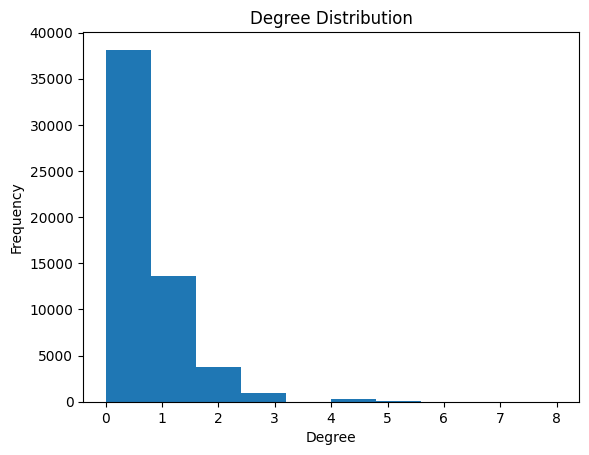

In [36]:
import matplotlib.pyplot as plt
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [37]:
print(f"Number of edges in the original graph: {G.number_of_edges()}")
print(f"Sample edges: {list(G.edges())[:5]}")

Number of edges in the original graph: 12736
Sample edges: [('2091497559', '2070287601'), ('1976561044', '2077463666'), ('2157113258', '2005952415'), ('2076705600', '2029267792'), ('2101163503', '2121942203')]


In [39]:
import pickle

# save the graph G
with open("citation_graph.gpickle", "wb") as f:
    pickle.dump(G, f)

Number of nodes in subgraph: 1319
Number of edges in subgraph: 591


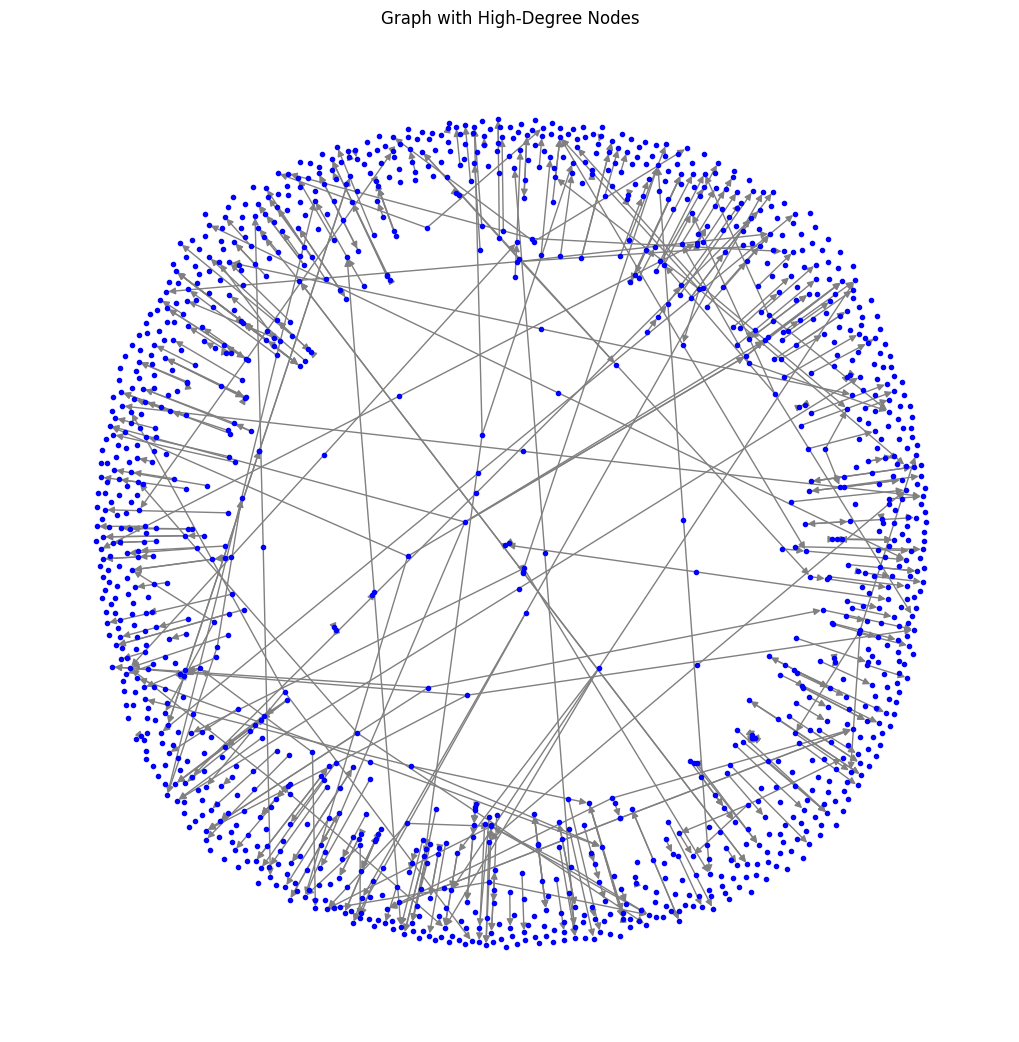

In [40]:
# Create a subgraph with the first 50 nodes
# Reduce the degree threshold
high_degree_nodes = [node for node, degree in G.degree() if degree > 2]  # Lower threshold
subgraph = G.subgraph(high_degree_nodes)

# Check the new subgraph
print(f"Number of nodes in subgraph: {subgraph.number_of_nodes()}")
print(f"Number of edges in subgraph: {subgraph.number_of_edges()}")

pos = nx.spring_layout(subgraph)  # Layout for visualization
plt.figure(figsize=(10, 10))
nx.draw(
    subgraph,
    pos,
    with_labels=False,
    node_size=9,
    node_color="blue",
    edge_color="gray",
    width=1.0,  # Ensure edges are visible
)
plt.title("Graph with High-Degree Nodes")
plt.show()

In [41]:
print(f"Number of edges: {subgraph.number_of_edges()}")
print(f"Sample edges: {list(subgraph.edges())[:5]}")

Number of edges: 591
Sample edges: [('2123182941', '2163347774'), ('2087293779', '2039453171'), ('1995542610', '2075500216'), ('2045690379', '2044722214'), ('2062899672', '2067298334')]


# Graph Based Community Detection

In [42]:
from community import community_louvain  
from tqdm import tqdm

# Louvain method for community detection
def louvain_community_detection(G, resolution = 0.5):
    """
    Detect communities in a graph using the Louvain method.
    """
    print("Detecting communities using Louvain method...")
    partition = community_louvain.best_partition(G, resolution=resolution)
    return partition

# Run the Louvain method
G_undirected = G.to_undirected()

resolution = 0.1
partition = louvain_community_detection(G_undirected, resolution)

# Add the detected communities to the graph
for node, community in partition.items():
    G_undirected.nodes[node]['community'] = community

# Output the number of communities detected
print(f"Number of communities detected: {len(set(partition.values()))}")

Detecting communities using Louvain method...
Number of communities detected: 44553


In [43]:
from collections import Counter

# Count the size of each community
community_sizes = Counter(partition.values())

# Print the largest communities
print("Largest communities:")
for community, size in community_sizes.most_common(10):
    print(f"Community {community}: {size} nodes")

Largest communities:
Community 357: 65 nodes
Community 748: 57 nodes
Community 1932: 48 nodes
Community 821: 44 nodes
Community 4400: 41 nodes
Community 317: 40 nodes
Community 1126: 32 nodes
Community 641: 30 nodes
Community 3032: 28 nodes
Community 543: 25 nodes


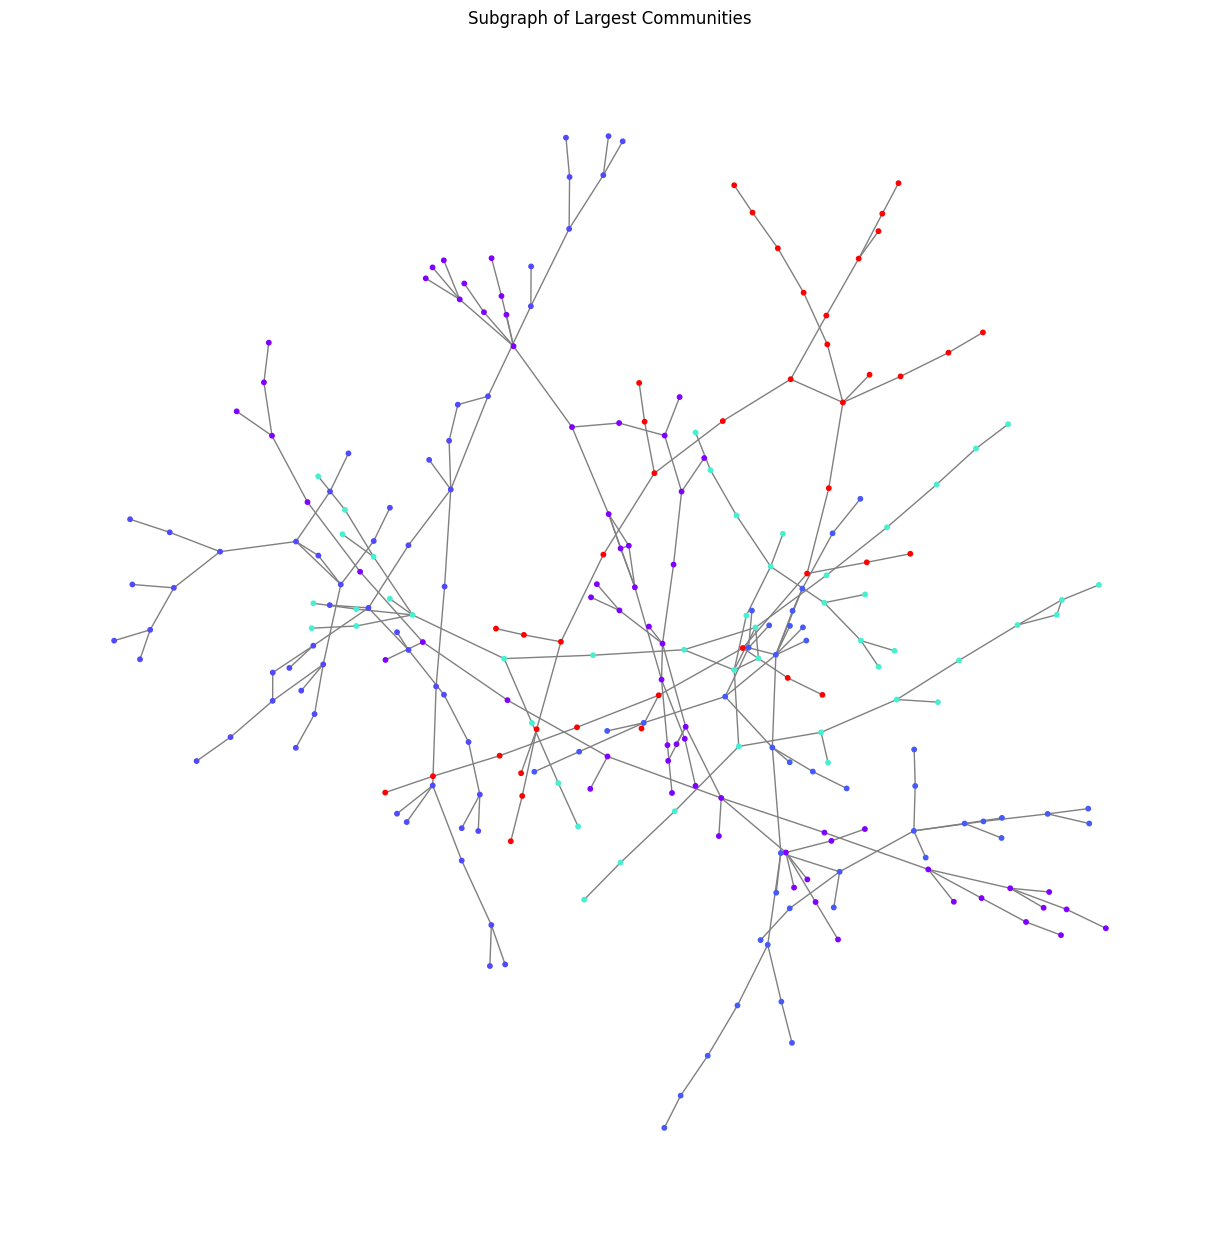

In [44]:
# Extract nodes from the largest communities
largest_communities = [community for community, size in community_sizes.most_common(5)]
nodes_to_visualize = [node for node, community in partition.items() if community in largest_communities]

# Create a subgraph
subgraph = G_undirected.subgraph(nodes_to_visualize)

# Visualize the subgraph
import matplotlib.pyplot as plt
import networkx as nx

# Assign colors to nodes based on their community
colors = [partition[node] for node in subgraph.nodes]

# Visualize using spring layout
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 12))
nx.draw(subgraph, pos, node_color=colors, cmap=plt.cm.rainbow, node_size=10, edge_color="gray")
plt.title("Subgraph of Largest Communities")
plt.show()

In [ ]:
import community as community_louvain

modularity = community_louvain.modularity(partition, G_undirected)
print(f"Modularity of the partition: {modularity}")
# Returns 0.9995
# means that the partition is very good
# the communities are well separated

Modularity of the partition: 0.9995649735508634


In [47]:
# save undirected graph and partition
with open('citation_graph_undirected.gpickle', 'wb') as f:
    pickle.dump(G_undirected, f)

with open('louvain_partition.pkl', 'wb') as f:
    pickle.dump(partition, f)

# Clustering Algorithms 

In [48]:
# read final dataset

from scipy.sparse import load_npz

final_dataset = load_npz('final_dataset.npz')

In [49]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)  # Adjust n_components as needed
reduced_features = svd.fit_transform(final_dataset)

In [50]:
# save reduced features
import numpy as np

np.save('reduced_features.npy', reduced_features)

In [51]:
from sklearn.cluster import SpectralClustering
import numpy as np 

spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
# labels = spectral.fit_predict(reduced_features)
# load the saved labels
labels = np.load('spectral_cluster_labels.npy')

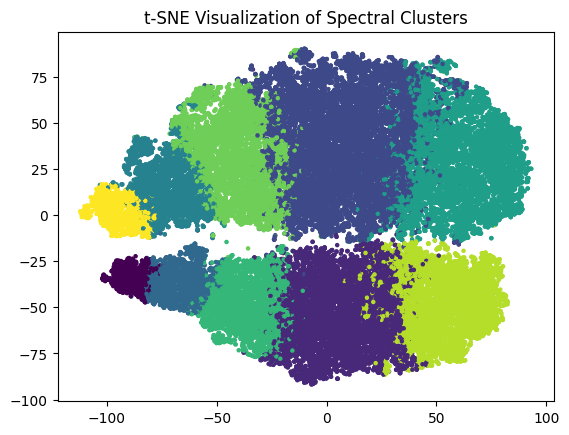

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization of Spectral Clusters')
plt.show()

In [53]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_features, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.11890024634550073


In [54]:
from sklearn.cluster import MiniBatchKMeans

# Use MiniBatchKMeans for large datasets
kmeans = MiniBatchKMeans(n_clusters=10, random_state=42, batch_size=10000)

# Fit the model using multiple cores
# kmeans.fit(reduced_features)

# k_means_labels = kmeans.labels_

k_means_labels = np.load('kmeans_cluster_labels.npy')

In [55]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_features, k_means_labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.13144550479597508


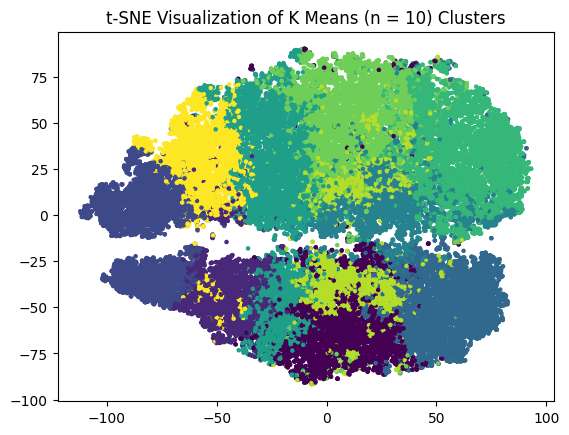

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=k_means_labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization of K Means (n = 10) Clusters')
plt.show()

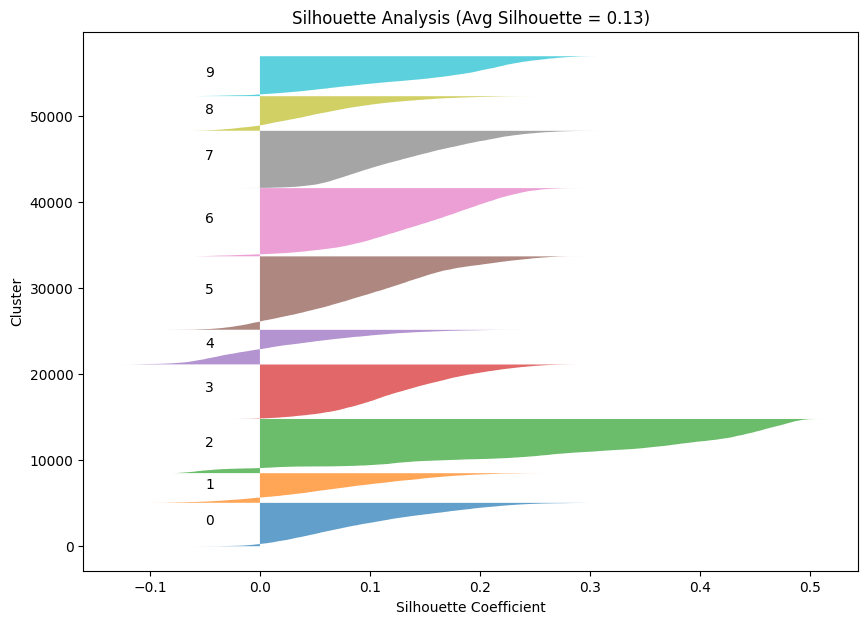

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores
silhouette_vals = silhouette_samples(reduced_features, k_means_labels)
silhouette_avg = silhouette_score(reduced_features, k_means_labels)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
y_lower = 10
for i in range(np.unique(k_means_labels).shape[0]):
    ith_cluster_silhouette_vals = silhouette_vals[k_means_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7,
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title(f"Silhouette Analysis (Avg Silhouette = {silhouette_avg:.2f})")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

# UMAP visualization

Processing Rows:   0%|          | 0/56788 [31:15<?, ?it/s]
2024-12-02 23:55:46.350562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 23:55:46.619386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 23:55:46.706487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 23:55:47.356207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler f

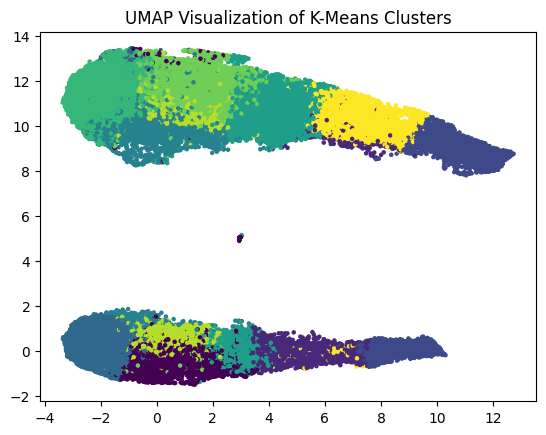

In [58]:
# UMAP visualization
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_components=2)
umap_embedding = reducer.fit_transform(reduced_features)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=k_means_labels, cmap='viridis', s=5)
plt.title('UMAP Visualization of K-Means Clusters')
plt.show()

In [59]:
df['cluster'] = k_means_labels
for cluster_num in np.unique(k_means_labels):
    cluster_data = df[df['cluster'] == cluster_num]
    keywords = cluster_data['keyword'].explode()
    top_keywords = keywords.value_counts().head(10)
    print(f"Cluster {cluster_num} Top Keywords:")
    print(top_keywords)
    print("\n")

Cluster 0 Top Keywords:
keyword
computer science             2345
mathematics                  1507
artificial intelligence      1464
computer vision               641
mathematical optimization     596
machine learning              479
engineering                   448
data mining                   435
control theory                402
pattern recognition           390
Name: count, dtype: int64


Cluster 1 Top Keywords:
keyword
computer science             1877
artificial intelligence      1362
mathematics                  1128
computer vision               630
pattern recognition           476
machine learning              438
mathematical optimization     318
control theory                266
data mining                   265
algorithm                     260
Name: count, dtype: int64


Cluster 2 Top Keywords:
keyword
computer science             3126
mathematics                  2847
artificial intelligence      1411
discrete mathematics         1225
combinatorics                 94

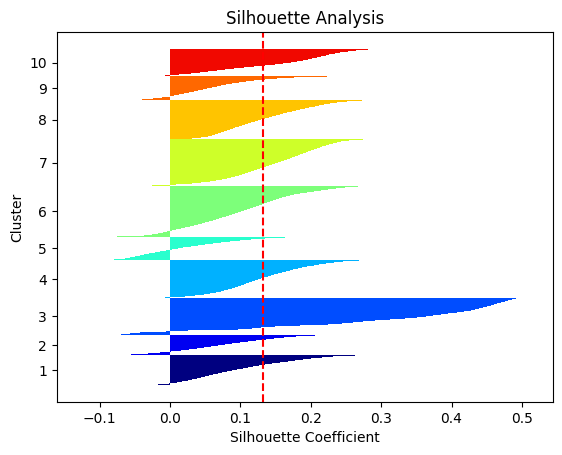

In [60]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

silhouette_vals = silhouette_samples(reduced_features, k_means_labels)
cluster_labels = np.unique(k_means_labels)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[k_means_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Analysis')
plt.show()

In [61]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative_labels = agglomerative.fit_predict(reduced_features)

# save labels
np.save('agglomerative_cluster_labels.npy', agglomerative_labels)

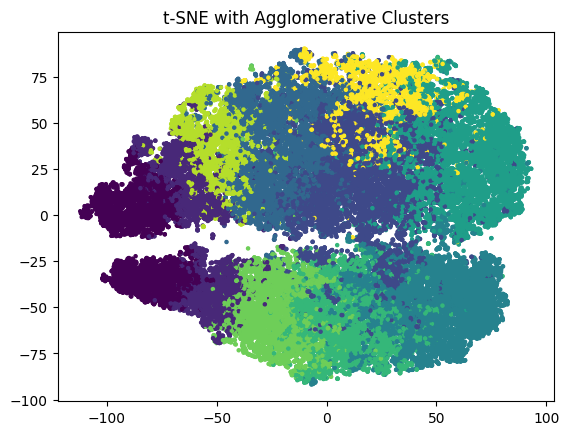

In [62]:
# Visualization
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agglomerative_labels, cmap='viridis', s=5)
plt.title('t-SNE with Agglomerative Clusters')
plt.show()

In [63]:
# hdbscan clustering
import hdbscan
import multiprocessing

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, core_dist_n_jobs=multiprocessing.cpu_count())
hdbscan_labels = clusterer.fit_predict(reduced_features)

# save labels 
np.save('hdbscan_cluster_labels.npy', hdbscan_labels)

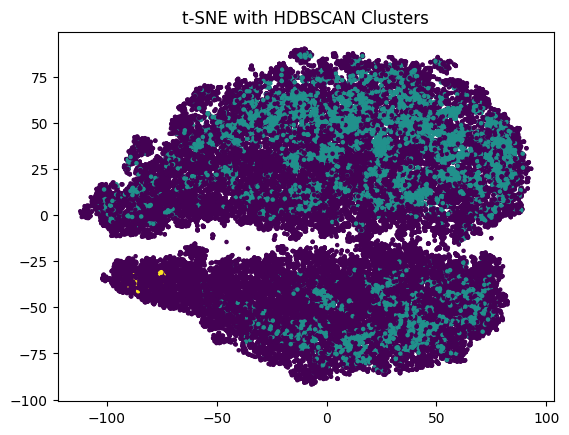

In [64]:
# Visualization
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=hdbscan_labels, cmap='viridis', s=5)
plt.title('t-SNE with HDBSCAN Clusters')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# from node2vec import Node2Vec
# import multiprocessing

# # Initialize Node2Vec model
# node2vec = Node2Vec(G_undirected, dimensions=64, walk_length=30, num_walks=200, workers=multiprocessing.cpu_count())

# # Fit model and get embeddings
# with tqdm_joblib(tqdm(desc="Fitting Node2Vec", total=1)):
#     model = node2vec.fit(window=10, min_count=1, batch_words=4)

# # Create embeddings matrix
# node_embeddings = np.array([model.wv[str(node)] for node in G_undirected.nodes()])

# # Save the model and embeddings
# model.save('node2vec.model')
# np.save('node_embeddings.npy', node_embeddings)

# # takes a lot of time to run